In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import os
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
torch.cuda.is_available()

False

In [2]:

# assign directory
directory = 'C:\\Users\\hp\\Desktop\\ICUAS Crack detect\\FBM2\\FBM2\\train'
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        print(f)
        

C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_002.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_002.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_003.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_003.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_004.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_004.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_005.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_005.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_006.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_006.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_008.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_008.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_009.jpg
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_009.txt
C:\Users\hp\Desktop\ICUAS Crack detect\FBM2\FBM2\train\CFD_010

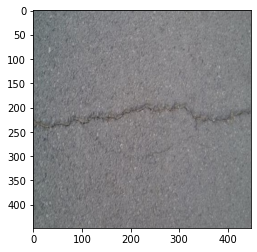

In [3]:
img = plt.imread('C:\\Users\\hp\\Desktop\\ICUAS Crack detect\\FBM2\\FBM2\\train\\CFD_009.jpg')
plt.imshow(img)

In [4]:
txt = open("C:\\Users\\hp\\Desktop\\ICUAS Crack detect\\FBM2\\FBM2\\train\\noncrack_noncrack_concrete_wall_2_4.txt")
X = txt.read()

In [5]:
X,type(X)

('', str)

In [6]:
type(img)

numpy.ndarray

In [7]:
X = []
Y = []

In [8]:
n_count = 0 
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if n_count%2 == 0:
        img = plt.imread(f)
        X.append(list(img))
    else:
        text_file = open(f)
        contents = text_file.read()
        if contents=='':
            Y.append(0) # no crack
        else:
            Y.append(1) # yes crack !
    n_count+=1

In [9]:
X_train = []
Y_train = []
X_test = []
Y_test = []
for i in range(int(len(Y))):
    if i<=int(len(Y)*0.2):
        X_test.append(X[i])
        Y_test.append(Y[i])
    else:
        X_train.append(X[i])
        Y_train.append(Y[i])

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
X_train.shape,X_test.shape

((3519, 448, 448, 3), (881, 448, 448, 3))

In [11]:
X_train[0].shape

(448, 448, 3)

In [12]:
model = models.densenet121(pretrained=True)
model

c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Freezing parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False

    
model.classifier = nn.Sequential(nn.Linear(1024, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [14]:
from PIL import Image
from matplotlib import cm

In [15]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array 
    '''
    image = Image.fromarray(image)
    size=(256,256)
    image.thumbnail(size)
    width, height = image.size   # Get dimensions
    new_width, new_height = 224,224
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    image = image.crop((left, top, right, bottom))
    
    #numpy array and normalize
    np_image = np.array(image)
    means = np.array([0.485, 0.456, 0.406])
    std= np.array([0.229, 0.224, 0.225])
    image = (image-means)/std
    image = image.transpose()
    return image

In [22]:
epochs = 2
steps = 0
running_loss = 0
print_every = 1
for epoch in range(epochs):
    for i in range(len(Y_train)):
        inputs = X_train[i]
        labels = Y_train[i]
        steps += 1
        # Move input and label tensors to the default device
        inputs = np.array(inputs)
        labels = np.array([labels])
        inputs = process_image(inputs)
        inputs = torch.from_numpy(inputs).to(device)
        inputs = inputs.view(1,3,224,224)
        # inputs = torch.from_numpy(inputs)
        # labels = torch.from_numpy(labels)
        # inputs = inputs.view(1,3,448,448)
        labels = torch.from_numpy(labels).to(device)
        labels = labels.type(torch.LongTensor)
        logps = model.forward(inputs.float())
        loss = criterion(logps, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for j in range(len(Y_test)):
                    inputs = X_test[j]
                    labels = np.array([Y_test[j]])
                    inputs = process_image(inputs)
                    inputs = torch.from_numpy(inputs).to(device)
                    inputs = inputs.view(1,3,224,224)
                    labels = torch.from_numpy(labels).to(device)
                    # inputs, labels = inputs.to(device), labels.to(device)
                    labels = labels.type(torch.LongTensor)
                    logps = model.forward(inputs.float())
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(Y_test):.3f}.. "
                  f"Test accuracy: {accuracy/len(Y_test):.3f}")
            if(test_loss==0):
                break
            running_loss = 0
            model.train()

Epoch 1/2.. Train loss: 0.000.. Test loss: 0.000.. Test accuracy: 1.000
Epoch 2/2.. Train loss: 0.000.. Test loss: 0.000.. Test accuracy: 1.000


In [53]:
torch.from_numpy(np.array([Y_train[0]]))

tensor([1], dtype=torch.int32)

In [54]:
np.array([1])

array([1])